In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import statistics as stats
import datetime

In [2]:
data = pd.read_csv('no_outliers/pow_cons_new1.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


In [18]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [19]:
data['date_time']

0       2009-04-13 21:18:00
1       2008-05-17 03:59:00
2       2007-01-24 01:41:00
3       2008-08-25 23:04:00
4       2008-12-18 04:44:00
                ...        
14392   2007-07-15 21:21:00
14393   2007-11-20 16:47:00
14394   2008-02-09 02:32:00
14395   2007-09-05 01:24:00
14396   2009-09-15 01:45:00
Name: date_time, Length: 14397, dtype: datetime64[ns]

In [21]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


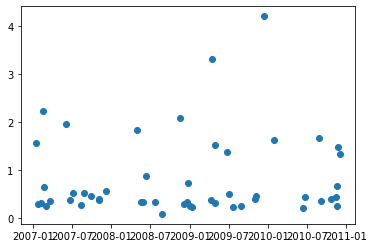

In [31]:
plt.plot_date(x=data['date_time'][:50].dt.date,y=data['Global_active_power'][:50])

In [38]:
for i in data['date_time']:
    print(i.strftime("%d %b %Y -- %H %M %S %p | "),i)

13 Apr 2009 -- 21 18 00 PM |  2009-04-13 21:18:00
17 May 2008 -- 03 59 00 AM |  2008-05-17 03:59:00
24 Jan 2007 -- 01 41 00 AM |  2007-01-24 01:41:00
25 Aug 2008 -- 23 04 00 PM |  2008-08-25 23:04:00
18 Dec 2008 -- 04 44 00 AM |  2008-12-18 04:44:00
01 Jun 2007 -- 14 56 00 PM |  2007-06-01 14:56:00
21 Jun 2010 -- 13 12 00 PM |  2010-06-21 13:12:00
21 Jul 2009 -- 04 04 00 AM |  2009-07-21 04:04:00
26 Sep 2007 -- 23 14 00 PM |  2007-09-26 23:14:00
22 Mar 2007 -- 03 06 00 AM |  2007-03-22 03:06:00
03 Jul 2009 -- 11 57 00 AM |  2009-07-03 11:57:00
14 Nov 2010 -- 23 20 00 PM |  2010-11-14 23:20:00
01 May 2008 -- 13 34 00 PM |  2008-05-01 13:34:00
03 Dec 2008 -- 05 25 00 AM |  2008-12-03 05:25:00
09 Apr 2009 -- 23 58 00 PM |  2009-04-09 23:58:00
17 Nov 2010 -- 23 47 00 PM |  2010-11-17 23:47:00
04 Dec 2010 -- 11 29 00 AM |  2010-12-04 11:29:00
01 Mar 2007 -- 03 08 00 AM |  2007-03-01 03:08:00
26 May 2008 -- 15 14 00 PM |  2008-05-26 15:14:00
27 Jan 2010 -- 23 31 00 PM |  2010-01-27 23:31:00


01 Apr 2008 -- 10 26 00 AM |  2008-04-01 10:26:00
18 Sep 2010 -- 10 33 00 AM |  2010-09-18 10:33:00
20 Sep 2010 -- 18 27 00 PM |  2010-09-20 18:27:00
07 Apr 2010 -- 04 57 00 AM |  2010-04-07 04:57:00
20 Mar 2009 -- 19 18 00 PM |  2009-03-20 19:18:00
19 Jul 2007 -- 10 33 00 AM |  2007-07-19 10:33:00
06 Aug 2007 -- 01 14 00 AM |  2007-08-06 01:14:00
13 Feb 2009 -- 00 35 00 AM |  2009-02-13 00:35:00
18 Jan 2010 -- 08 25 00 AM |  2010-01-18 08:25:00
10 Oct 2008 -- 21 29 00 PM |  2008-10-10 21:29:00
05 Dec 2010 -- 21 06 00 PM |  2010-12-05 21:06:00
07 Nov 2009 -- 07 28 00 AM |  2009-11-07 07:28:00
11 Jan 2007 -- 20 56 00 PM |  2007-01-11 20:56:00
11 Mar 2009 -- 18 25 00 PM |  2009-03-11 18:25:00
18 Jan 2008 -- 00 52 00 AM |  2008-01-18 00:52:00
08 Jan 2007 -- 10 10 00 AM |  2007-01-08 10:10:00
26 Jun 2010 -- 02 59 00 AM |  2010-06-26 02:59:00
27 Jan 2008 -- 17 07 00 PM |  2008-01-27 17:07:00
30 May 2008 -- 12 51 00 PM |  2008-05-30 12:51:00
08 Feb 2007 -- 04 52 00 AM |  2007-02-08 04:52:00


10 Oct 2008 -- 19 57 00 PM |  2008-10-10 19:57:00
03 Nov 2009 -- 00 49 00 AM |  2009-11-03 00:49:00
28 Sep 2007 -- 12 02 00 PM |  2007-09-28 12:02:00
24 Feb 2010 -- 18 48 00 PM |  2010-02-24 18:48:00
16 Apr 2008 -- 12 06 00 PM |  2008-04-16 12:06:00
23 Jan 2010 -- 12 42 00 PM |  2010-01-23 12:42:00
10 Nov 2009 -- 00 28 00 AM |  2009-11-10 00:28:00
23 Mar 2009 -- 02 03 00 AM |  2009-03-23 02:03:00
04 Mar 2008 -- 17 38 00 PM |  2008-03-04 17:38:00
22 Aug 2008 -- 19 41 00 PM |  2008-08-22 19:41:00
28 Oct 2008 -- 09 50 00 AM |  2008-10-28 09:50:00
06 Nov 2007 -- 04 05 00 AM |  2007-11-06 04:05:00
11 Jul 2010 -- 19 31 00 PM |  2010-07-11 19:31:00
10 Sep 2007 -- 01 28 00 AM |  2007-09-10 01:28:00
03 Apr 2010 -- 06 03 00 AM |  2010-04-03 06:03:00
10 Oct 2007 -- 09 19 00 AM |  2007-10-10 09:19:00
05 Aug 2010 -- 17 07 00 PM |  2010-08-05 17:07:00
08 Dec 2009 -- 19 38 00 PM |  2009-12-08 19:38:00
10 Jan 2007 -- 03 56 00 AM |  2007-01-10 03:56:00
21 Feb 2009 -- 09 29 00 AM |  2009-02-21 09:29:00


18 Jul 2009 -- 02 06 00 AM |  2009-07-18 02:06:00
04 Oct 2010 -- 21 48 00 PM |  2010-10-04 21:48:00
21 Apr 2009 -- 02 20 00 AM |  2009-04-21 02:20:00
09 Jun 2007 -- 12 15 00 PM |  2007-06-09 12:15:00
07 Jul 2009 -- 11 43 00 AM |  2009-07-07 11:43:00
03 Sep 2008 -- 03 52 00 AM |  2008-09-03 03:52:00
16 Nov 2010 -- 18 50 00 PM |  2010-11-16 18:50:00
05 Nov 2009 -- 04 42 00 AM |  2009-11-05 04:42:00
04 Nov 2009 -- 22 59 00 PM |  2009-11-04 22:59:00
01 May 2007 -- 01 50 00 AM |  2007-05-01 01:50:00
14 Feb 2009 -- 04 56 00 AM |  2009-02-14 04:56:00
11 Jan 2009 -- 12 16 00 PM |  2009-01-11 12:16:00
08 Mar 2010 -- 16 56 00 PM |  2010-03-08 16:56:00
11 Feb 2009 -- 13 39 00 PM |  2009-02-11 13:39:00
23 Jul 2007 -- 17 41 00 PM |  2007-07-23 17:41:00
07 Mar 2010 -- 03 55 00 AM |  2010-03-07 03:55:00
28 Oct 2007 -- 05 31 00 AM |  2007-10-28 05:31:00
01 Apr 2009 -- 12 42 00 PM |  2009-04-01 12:42:00
02 Jul 2008 -- 05 51 00 AM |  2008-07-02 05:51:00
18 Oct 2009 -- 22 01 00 PM |  2009-10-18 22:01:00


16 May 2008 -- 07 44 00 AM |  2008-05-16 07:44:00
21 Apr 2008 -- 03 37 00 AM |  2008-04-21 03:37:00
04 Mar 2010 -- 21 18 00 PM |  2010-03-04 21:18:00
14 Sep 2007 -- 20 48 00 PM |  2007-09-14 20:48:00
14 May 2007 -- 00 28 00 AM |  2007-05-14 00:28:00
08 Jul 2009 -- 05 10 00 AM |  2009-07-08 05:10:00
03 Jul 2007 -- 21 24 00 PM |  2007-07-03 21:24:00
20 May 2010 -- 20 28 00 PM |  2010-05-20 20:28:00
26 Jun 2010 -- 13 37 00 PM |  2010-06-26 13:37:00
21 Mar 2009 -- 09 06 00 AM |  2009-03-21 09:06:00
14 Mar 2010 -- 18 57 00 PM |  2010-03-14 18:57:00
16 Jul 2010 -- 21 24 00 PM |  2010-07-16 21:24:00
08 Feb 2008 -- 00 36 00 AM |  2008-02-08 00:36:00
19 Aug 2007 -- 17 33 00 PM |  2007-08-19 17:33:00
07 Oct 2010 -- 01 48 00 AM |  2010-10-07 01:48:00
07 Apr 2009 -- 13 08 00 PM |  2009-04-07 13:08:00
08 Mar 2009 -- 00 13 00 AM |  2009-03-08 00:13:00
19 Dec 2009 -- 07 35 00 AM |  2009-12-19 07:35:00
20 Dec 2007 -- 12 43 00 PM |  2007-12-20 12:43:00
10 Mar 2010 -- 12 42 00 PM |  2010-03-10 12:42:00


28 Mar 2010 -- 18 40 00 PM |  2010-03-28 18:40:00
18 Jun 2007 -- 05 16 00 AM |  2007-06-18 05:16:00
19 Jan 2008 -- 09 07 00 AM |  2008-01-19 09:07:00
25 Mar 2009 -- 07 14 00 AM |  2009-03-25 07:14:00
26 Dec 2009 -- 17 51 00 PM |  2009-12-26 17:51:00
21 May 2010 -- 15 48 00 PM |  2010-05-21 15:48:00
14 May 2009 -- 09 27 00 AM |  2009-05-14 09:27:00
02 Nov 2008 -- 14 08 00 PM |  2008-11-02 14:08:00
24 Jan 2007 -- 03 57 00 AM |  2007-01-24 03:57:00
17 Jul 2010 -- 02 27 00 AM |  2010-07-17 02:27:00
18 Jun 2009 -- 10 52 00 AM |  2009-06-18 10:52:00
19 Mar 2007 -- 08 43 00 AM |  2007-03-19 08:43:00
04 Mar 2009 -- 03 01 00 AM |  2009-03-04 03:01:00
11 Jul 2009 -- 19 22 00 PM |  2009-07-11 19:22:00
30 Jan 2010 -- 12 15 00 PM |  2010-01-30 12:15:00
10 Aug 2007 -- 03 50 00 AM |  2007-08-10 03:50:00
07 Nov 2007 -- 21 58 00 PM |  2007-11-07 21:58:00
28 Dec 2008 -- 07 10 00 AM |  2008-12-28 07:10:00
15 May 2008 -- 02 46 00 AM |  2008-05-15 02:46:00
10 Jul 2010 -- 07 19 00 AM |  2010-07-10 07:19:00


28 Mar 2008 -- 17 42 00 PM |  2008-03-28 17:42:00
10 Nov 2009 -- 16 17 00 PM |  2009-11-10 16:17:00
02 Aug 2007 -- 13 29 00 PM |  2007-08-02 13:29:00
26 May 2007 -- 18 44 00 PM |  2007-05-26 18:44:00
05 Oct 2007 -- 12 18 00 PM |  2007-10-05 12:18:00
10 May 2007 -- 19 28 00 PM |  2007-05-10 19:28:00
05 Apr 2010 -- 06 39 00 AM |  2010-04-05 06:39:00
11 Aug 2009 -- 15 35 00 PM |  2009-08-11 15:35:00
23 Dec 2009 -- 18 07 00 PM |  2009-12-23 18:07:00
19 Jul 2007 -- 23 57 00 PM |  2007-07-19 23:57:00
16 Dec 2007 -- 17 34 00 PM |  2007-12-16 17:34:00
05 Oct 2008 -- 11 21 00 AM |  2008-10-05 11:21:00
08 Jan 2009 -- 05 08 00 AM |  2009-01-08 05:08:00
11 Jun 2008 -- 16 34 00 PM |  2008-06-11 16:34:00
21 Aug 2008 -- 23 59 00 PM |  2008-08-21 23:59:00
03 Mar 2007 -- 16 20 00 PM |  2007-03-03 16:20:00
27 Dec 2006 -- 00 45 00 AM |  2006-12-27 00:45:00
12 Mar 2008 -- 18 54 00 PM |  2008-03-12 18:54:00
16 Mar 2008 -- 15 17 00 PM |  2008-03-16 15:17:00
24 Nov 2010 -- 19 47 00 PM |  2010-11-24 19:47:00


14 Jan 2009 -- 15 23 00 PM |  2009-01-14 15:23:00
06 Oct 2010 -- 15 39 00 PM |  2010-10-06 15:39:00
26 May 2008 -- 04 07 00 AM |  2008-05-26 04:07:00
30 Apr 2009 -- 18 03 00 PM |  2009-04-30 18:03:00
07 Feb 2007 -- 00 34 00 AM |  2007-02-07 00:34:00
03 Jan 2010 -- 07 07 00 AM |  2010-01-03 07:07:00
12 Feb 2008 -- 02 40 00 AM |  2008-02-12 02:40:00
29 Apr 2010 -- 20 52 00 PM |  2010-04-29 20:52:00
24 Jun 2009 -- 03 49 00 AM |  2009-06-24 03:49:00
07 Feb 2009 -- 18 55 00 PM |  2009-02-07 18:55:00
02 Sep 2009 -- 17 44 00 PM |  2009-09-02 17:44:00
09 Sep 2010 -- 23 42 00 PM |  2010-09-09 23:42:00
30 Jan 2007 -- 02 04 00 AM |  2007-01-30 02:04:00
29 Sep 2010 -- 17 47 00 PM |  2010-09-29 17:47:00
30 Jul 2008 -- 15 49 00 PM |  2008-07-30 15:49:00
30 Dec 2009 -- 12 35 00 PM |  2009-12-30 12:35:00
01 Jun 2009 -- 06 16 00 AM |  2009-06-01 06:16:00
28 Jan 2010 -- 00 15 00 AM |  2010-01-28 00:15:00
28 Oct 2008 -- 13 35 00 PM |  2008-10-28 13:35:00
16 Dec 2007 -- 07 34 00 AM |  2007-12-16 07:34:00


14 Nov 2010 -- 02 42 00 AM |  2010-11-14 02:42:00
06 Apr 2009 -- 20 30 00 PM |  2009-04-06 20:30:00
26 Jun 2010 -- 21 14 00 PM |  2010-06-26 21:14:00
25 Jun 2009 -- 04 44 00 AM |  2009-06-25 04:44:00
07 Aug 2009 -- 07 19 00 AM |  2009-08-07 07:19:00
03 Aug 2009 -- 00 03 00 AM |  2009-08-03 00:03:00
02 Aug 2010 -- 10 06 00 AM |  2010-08-02 10:06:00
31 May 2007 -- 07 37 00 AM |  2007-05-31 07:37:00
04 Jul 2009 -- 12 24 00 PM |  2009-07-04 12:24:00
22 Apr 2010 -- 12 14 00 PM |  2010-04-22 12:14:00
21 Sep 2010 -- 17 26 00 PM |  2010-09-21 17:26:00
17 Mar 2008 -- 21 42 00 PM |  2008-03-17 21:42:00
10 Dec 2010 -- 00 40 00 AM |  2010-12-10 00:40:00
29 Jun 2007 -- 20 52 00 PM |  2007-06-29 20:52:00
20 May 2008 -- 07 29 00 AM |  2008-05-20 07:29:00
03 May 2007 -- 02 39 00 AM |  2007-05-03 02:39:00
29 Nov 2009 -- 03 33 00 AM |  2009-11-29 03:33:00
19 Aug 2007 -- 10 39 00 AM |  2007-08-19 10:39:00
01 Jan 2007 -- 20 04 00 PM |  2007-01-01 20:04:00
26 May 2009 -- 21 06 00 PM |  2009-05-26 21:06:00


18 Apr 2007 -- 12 24 00 PM |  2007-04-18 12:24:00
16 Apr 2008 -- 17 19 00 PM |  2008-04-16 17:19:00
01 Jan 2008 -- 05 47 00 AM |  2008-01-01 05:47:00
28 Aug 2009 -- 22 32 00 PM |  2009-08-28 22:32:00
04 May 2010 -- 21 28 00 PM |  2010-05-04 21:28:00
10 Feb 2009 -- 19 00 00 PM |  2009-02-10 19:00:00
13 Aug 2008 -- 12 35 00 PM |  2008-08-13 12:35:00
24 Dec 2007 -- 23 38 00 PM |  2007-12-24 23:38:00
26 May 2009 -- 13 20 00 PM |  2009-05-26 13:20:00
22 Jun 2007 -- 02 35 00 AM |  2007-06-22 02:35:00
10 Jun 2010 -- 12 07 00 PM |  2010-06-10 12:07:00
26 Jun 2007 -- 10 13 00 AM |  2007-06-26 10:13:00
04 Sep 2008 -- 16 34 00 PM |  2008-09-04 16:34:00
26 Nov 2007 -- 19 30 00 PM |  2007-11-26 19:30:00
20 Jan 2009 -- 22 12 00 PM |  2009-01-20 22:12:00
31 Aug 2009 -- 23 42 00 PM |  2009-08-31 23:42:00
03 Jun 2009 -- 04 47 00 AM |  2009-06-03 04:47:00
18 Nov 2010 -- 07 19 00 AM |  2010-11-18 07:19:00
11 Oct 2007 -- 04 30 00 AM |  2007-10-11 04:30:00
17 Nov 2009 -- 01 28 00 AM |  2009-11-17 01:28:00


05 Nov 2009 -- 03 05 00 AM |  2009-11-05 03:05:00
31 May 2008 -- 12 03 00 PM |  2008-05-31 12:03:00
24 Oct 2008 -- 18 45 00 PM |  2008-10-24 18:45:00
05 Nov 2007 -- 08 48 00 AM |  2007-11-05 08:48:00
17 Oct 2008 -- 14 24 00 PM |  2008-10-17 14:24:00
22 Dec 2008 -- 00 51 00 AM |  2008-12-22 00:51:00
05 Aug 2008 -- 13 22 00 PM |  2008-08-05 13:22:00
27 Mar 2007 -- 16 36 00 PM |  2007-03-27 16:36:00
20 Dec 2008 -- 09 05 00 AM |  2008-12-20 09:05:00
18 Jan 2010 -- 00 02 00 AM |  2010-01-18 00:02:00
27 Sep 2007 -- 05 09 00 AM |  2007-09-27 05:09:00
31 Jan 2010 -- 14 25 00 PM |  2010-01-31 14:25:00
03 Jul 2009 -- 06 24 00 AM |  2009-07-03 06:24:00
08 Sep 2008 -- 04 55 00 AM |  2008-09-08 04:55:00
29 Jun 2009 -- 04 35 00 AM |  2009-06-29 04:35:00
05 Oct 2010 -- 06 32 00 AM |  2010-10-05 06:32:00
02 Oct 2010 -- 15 25 00 PM |  2010-10-02 15:25:00
23 Sep 2009 -- 08 55 00 AM |  2009-09-23 08:55:00
16 Apr 2009 -- 11 38 00 AM |  2009-04-16 11:38:00
22 Sep 2008 -- 07 30 00 AM |  2008-09-22 07:30:00


16 Sep 2010 -- 12 53 00 PM |  2010-09-16 12:53:00
21 Jun 2009 -- 15 21 00 PM |  2009-06-21 15:21:00
01 Mar 2008 -- 10 39 00 AM |  2008-03-01 10:39:00
31 May 2009 -- 05 46 00 AM |  2009-05-31 05:46:00
30 Oct 2010 -- 07 16 00 AM |  2010-10-30 07:16:00
26 Jun 2009 -- 15 05 00 PM |  2009-06-26 15:05:00
21 Jul 2007 -- 00 28 00 AM |  2007-07-21 00:28:00
27 Aug 2008 -- 12 49 00 PM |  2008-08-27 12:49:00
02 Oct 2009 -- 02 16 00 AM |  2009-10-02 02:16:00
08 Apr 2008 -- 06 29 00 AM |  2008-04-08 06:29:00
28 Mar 2007 -- 21 01 00 PM |  2007-03-28 21:01:00
19 Jun 2010 -- 05 51 00 AM |  2010-06-19 05:51:00
11 Feb 2007 -- 00 36 00 AM |  2007-02-11 00:36:00
31 Mar 2009 -- 09 48 00 AM |  2009-03-31 09:48:00
22 May 2008 -- 02 58 00 AM |  2008-05-22 02:58:00
24 Aug 2010 -- 01 50 00 AM |  2010-08-24 01:50:00
07 Aug 2008 -- 07 44 00 AM |  2008-08-07 07:44:00
06 Jan 2008 -- 23 32 00 PM |  2008-01-06 23:32:00
14 Oct 2010 -- 05 19 00 AM |  2010-10-14 05:19:00
31 Dec 2009 -- 21 43 00 PM |  2009-12-31 21:43:00


20 Aug 2009 -- 00 24 00 AM |  2009-08-20 00:24:00
15 Apr 2007 -- 00 28 00 AM |  2007-04-15 00:28:00
07 Mar 2007 -- 04 06 00 AM |  2007-03-07 04:06:00
19 Sep 2007 -- 15 24 00 PM |  2007-09-19 15:24:00
26 Oct 2009 -- 07 01 00 AM |  2009-10-26 07:01:00
10 Dec 2009 -- 19 39 00 PM |  2009-12-10 19:39:00
22 Nov 2008 -- 13 24 00 PM |  2008-11-22 13:24:00
02 Jun 2007 -- 14 06 00 PM |  2007-06-02 14:06:00
18 Mar 2008 -- 10 14 00 AM |  2008-03-18 10:14:00
24 Jan 2010 -- 14 31 00 PM |  2010-01-24 14:31:00
01 May 2009 -- 04 34 00 AM |  2009-05-01 04:34:00
19 Mar 2010 -- 15 53 00 PM |  2010-03-19 15:53:00
08 Jul 2008 -- 02 31 00 AM |  2008-07-08 02:31:00
25 Oct 2010 -- 08 56 00 AM |  2010-10-25 08:56:00
14 Jun 2010 -- 23 23 00 PM |  2010-06-14 23:23:00
06 Jan 2007 -- 09 16 00 AM |  2007-01-06 09:16:00
01 Dec 2008 -- 19 20 00 PM |  2008-12-01 19:20:00
02 Dec 2008 -- 03 07 00 AM |  2008-12-02 03:07:00
31 May 2007 -- 08 54 00 AM |  2007-05-31 08:54:00
07 Mar 2010 -- 06 12 00 AM |  2010-03-07 06:12:00


31 Mar 2009 -- 02 56 00 AM |  2009-03-31 02:56:00
28 Sep 2008 -- 10 06 00 AM |  2008-09-28 10:06:00
01 Mar 2008 -- 17 29 00 PM |  2008-03-01 17:29:00
27 Sep 2009 -- 19 15 00 PM |  2009-09-27 19:15:00
09 Feb 2007 -- 20 16 00 PM |  2007-02-09 20:16:00
10 Dec 2008 -- 18 48 00 PM |  2008-12-10 18:48:00
11 Apr 2008 -- 13 54 00 PM |  2008-04-11 13:54:00
09 Nov 2009 -- 00 03 00 AM |  2009-11-09 00:03:00
24 Dec 2007 -- 19 17 00 PM |  2007-12-24 19:17:00
18 Mar 2010 -- 12 44 00 PM |  2010-03-18 12:44:00
16 Jun 2010 -- 12 28 00 PM |  2010-06-16 12:28:00
07 Jan 2008 -- 06 43 00 AM |  2008-01-07 06:43:00
23 Jul 2010 -- 11 16 00 AM |  2010-07-23 11:16:00
03 May 2007 -- 20 44 00 PM |  2007-05-03 20:44:00
02 Aug 2008 -- 03 03 00 AM |  2008-08-02 03:03:00
02 Jan 2008 -- 18 40 00 PM |  2008-01-02 18:40:00
17 Jun 2009 -- 22 57 00 PM |  2009-06-17 22:57:00
09 Aug 2010 -- 18 32 00 PM |  2010-08-09 18:32:00
24 May 2007 -- 07 06 00 AM |  2007-05-24 07:06:00
05 Oct 2009 -- 13 22 00 PM |  2009-10-05 13:22:00


06 Nov 2010 -- 11 32 00 AM |  2010-11-06 11:32:00
11 Apr 2010 -- 18 21 00 PM |  2010-04-11 18:21:00
23 Mar 2008 -- 08 06 00 AM |  2008-03-23 08:06:00
11 Mar 2008 -- 16 59 00 PM |  2008-03-11 16:59:00
08 Nov 2007 -- 06 30 00 AM |  2007-11-08 06:30:00
03 Jun 2007 -- 19 47 00 PM |  2007-06-03 19:47:00
11 Jan 2009 -- 04 47 00 AM |  2009-01-11 04:47:00
15 Jun 2008 -- 09 49 00 AM |  2008-06-15 09:49:00
02 Sep 2010 -- 16 41 00 PM |  2010-09-02 16:41:00
29 Mar 2008 -- 04 45 00 AM |  2008-03-29 04:45:00
02 Aug 2007 -- 08 01 00 AM |  2007-08-02 08:01:00
04 May 2008 -- 09 46 00 AM |  2008-05-04 09:46:00
07 Mar 2007 -- 18 09 00 PM |  2007-03-07 18:09:00
05 Mar 2009 -- 02 13 00 AM |  2009-03-05 02:13:00
26 Dec 2007 -- 01 01 00 AM |  2007-12-26 01:01:00
06 Sep 2007 -- 17 18 00 PM |  2007-09-06 17:18:00
13 Sep 2007 -- 09 49 00 AM |  2007-09-13 09:49:00
19 Jul 2010 -- 10 58 00 AM |  2010-07-19 10:58:00
19 Jun 2007 -- 13 04 00 PM |  2007-06-19 13:04:00
16 Feb 2009 -- 18 06 00 PM |  2009-02-16 18:06:00


07 Nov 2010 -- 05 21 00 AM |  2010-11-07 05:21:00
25 Aug 2009 -- 11 24 00 AM |  2009-08-25 11:24:00
20 Jan 2009 -- 13 15 00 PM |  2009-01-20 13:15:00
23 Oct 2007 -- 21 49 00 PM |  2007-10-23 21:49:00
05 Sep 2010 -- 12 28 00 PM |  2010-09-05 12:28:00
10 Dec 2007 -- 22 54 00 PM |  2007-12-10 22:54:00
28 Aug 2008 -- 07 54 00 AM |  2008-08-28 07:54:00
09 Sep 2008 -- 16 28 00 PM |  2008-09-09 16:28:00
10 Jul 2009 -- 06 23 00 AM |  2009-07-10 06:23:00
13 Mar 2008 -- 06 22 00 AM |  2008-03-13 06:22:00
08 Aug 2008 -- 07 16 00 AM |  2008-08-08 07:16:00
29 May 2007 -- 19 53 00 PM |  2007-05-29 19:53:00
31 Aug 2009 -- 23 17 00 PM |  2009-08-31 23:17:00
10 Feb 2010 -- 16 51 00 PM |  2010-02-10 16:51:00
18 Jul 2007 -- 03 12 00 AM |  2007-07-18 03:12:00
17 Aug 2010 -- 13 19 00 PM |  2010-08-17 13:19:00
20 Sep 2008 -- 02 56 00 AM |  2008-09-20 02:56:00
03 Jul 2009 -- 10 38 00 AM |  2009-07-03 10:38:00
01 Sep 2010 -- 11 34 00 AM |  2010-09-01 11:34:00
05 Jul 2008 -- 20 41 00 PM |  2008-07-05 20:41:00


20 Jan 2009 -- 15 03 00 PM |  2009-01-20 15:03:00
11 Feb 2008 -- 05 31 00 AM |  2008-02-11 05:31:00
28 Jul 2008 -- 17 38 00 PM |  2008-07-28 17:38:00
25 Oct 2008 -- 06 40 00 AM |  2008-10-25 06:40:00
06 Jan 2010 -- 19 38 00 PM |  2010-01-06 19:38:00
13 Jan 2008 -- 02 14 00 AM |  2008-01-13 02:14:00
24 Apr 2007 -- 22 56 00 PM |  2007-04-24 22:56:00
02 Jun 2007 -- 21 41 00 PM |  2007-06-02 21:41:00
06 Feb 2010 -- 22 01 00 PM |  2010-02-06 22:01:00
30 Jun 2010 -- 16 12 00 PM |  2010-06-30 16:12:00
30 Jul 2010 -- 15 41 00 PM |  2010-07-30 15:41:00
14 Feb 2010 -- 15 38 00 PM |  2010-02-14 15:38:00
11 Oct 2007 -- 10 17 00 AM |  2007-10-11 10:17:00
21 Jun 2007 -- 04 04 00 AM |  2007-06-21 04:04:00
09 Jul 2010 -- 06 19 00 AM |  2010-07-09 06:19:00
02 Nov 2008 -- 17 22 00 PM |  2008-11-02 17:22:00
02 Apr 2009 -- 00 48 00 AM |  2009-04-02 00:48:00
13 Apr 2009 -- 21 09 00 PM |  2009-04-13 21:09:00
15 Oct 2008 -- 17 50 00 PM |  2008-10-15 17:50:00
08 Sep 2008 -- 17 46 00 PM |  2008-09-08 17:46:00


23 Feb 2009 -- 11 38 00 AM |  2009-02-23 11:38:00
05 Apr 2007 -- 01 33 00 AM |  2007-04-05 01:33:00
18 Mar 2008 -- 07 20 00 AM |  2008-03-18 07:20:00
29 Sep 2009 -- 07 39 00 AM |  2009-09-29 07:39:00
18 Aug 2009 -- 19 15 00 PM |  2009-08-18 19:15:00
06 Aug 2010 -- 22 59 00 PM |  2010-08-06 22:59:00
13 Oct 2007 -- 11 46 00 AM |  2007-10-13 11:46:00
21 Jul 2008 -- 02 11 00 AM |  2008-07-21 02:11:00
13 Jan 2008 -- 10 26 00 AM |  2008-01-13 10:26:00
28 Jul 2008 -- 15 18 00 PM |  2008-07-28 15:18:00
22 Jan 2009 -- 01 54 00 AM |  2009-01-22 01:54:00
03 Apr 2008 -- 20 45 00 PM |  2008-04-03 20:45:00
17 Dec 2009 -- 00 19 00 AM |  2009-12-17 00:19:00
22 Jul 2010 -- 09 22 00 AM |  2010-07-22 09:22:00
01 Dec 2007 -- 08 35 00 AM |  2007-12-01 08:35:00
06 Apr 2009 -- 07 02 00 AM |  2009-04-06 07:02:00
17 Dec 2008 -- 08 40 00 AM |  2008-12-17 08:40:00
22 Mar 2009 -- 07 43 00 AM |  2009-03-22 07:43:00
15 Sep 2007 -- 07 20 00 AM |  2007-09-15 07:20:00
24 Jun 2007 -- 12 10 00 PM |  2007-06-24 12:10:00


30 May 2010 -- 01 12 00 AM |  2010-05-30 01:12:00
30 Oct 2008 -- 02 08 00 AM |  2008-10-30 02:08:00
03 Jan 2009 -- 00 55 00 AM |  2009-01-03 00:55:00
21 Feb 2007 -- 05 56 00 AM |  2007-02-21 05:56:00
15 Dec 2008 -- 11 09 00 AM |  2008-12-15 11:09:00
02 Apr 2009 -- 20 04 00 PM |  2009-04-02 20:04:00
01 Dec 2008 -- 02 32 00 AM |  2008-12-01 02:32:00
21 Jun 2008 -- 05 51 00 AM |  2008-06-21 05:51:00
14 Apr 2007 -- 11 23 00 AM |  2007-04-14 11:23:00
27 Jul 2007 -- 22 55 00 PM |  2007-07-27 22:55:00
08 Dec 2010 -- 09 40 00 AM |  2010-12-08 09:40:00
03 Apr 2007 -- 09 06 00 AM |  2007-04-03 09:06:00
29 Jul 2010 -- 01 35 00 AM |  2010-07-29 01:35:00
11 Dec 2007 -- 10 57 00 AM |  2007-12-11 10:57:00
05 Apr 2008 -- 15 19 00 PM |  2008-04-05 15:19:00
25 Mar 2008 -- 22 33 00 PM |  2008-03-25 22:33:00
14 Feb 2010 -- 13 14 00 PM |  2010-02-14 13:14:00
02 Jul 2009 -- 05 23 00 AM |  2009-07-02 05:23:00
22 Mar 2009 -- 19 33 00 PM |  2009-03-22 19:33:00
23 Jun 2007 -- 02 38 00 AM |  2007-06-23 02:38:00


05 Jan 2007 -- 22 38 00 PM |  2007-01-05 22:38:00
03 Dec 2007 -- 19 58 00 PM |  2007-12-03 19:58:00
21 Feb 2010 -- 05 03 00 AM |  2010-02-21 05:03:00
13 Mar 2008 -- 02 49 00 AM |  2008-03-13 02:49:00
26 Jun 2010 -- 23 27 00 PM |  2010-06-26 23:27:00
08 Apr 2008 -- 22 21 00 PM |  2008-04-08 22:21:00
16 Nov 2010 -- 22 05 00 PM |  2010-11-16 22:05:00
22 Nov 2010 -- 03 02 00 AM |  2010-11-22 03:02:00
05 Feb 2009 -- 04 05 00 AM |  2009-02-05 04:05:00
06 Aug 2008 -- 02 33 00 AM |  2008-08-06 02:33:00
11 Mar 2008 -- 02 24 00 AM |  2008-03-11 02:24:00
13 Jul 2007 -- 06 50 00 AM |  2007-07-13 06:50:00
17 Jul 2010 -- 22 19 00 PM |  2010-07-17 22:19:00
17 Jan 2007 -- 20 26 00 PM |  2007-01-17 20:26:00
31 Mar 2008 -- 20 50 00 PM |  2008-03-31 20:50:00
12 May 2007 -- 01 07 00 AM |  2007-05-12 01:07:00
21 May 2009 -- 09 27 00 AM |  2009-05-21 09:27:00
25 Nov 2009 -- 02 55 00 AM |  2009-11-25 02:55:00
01 Jun 2007 -- 22 30 00 PM |  2007-06-01 22:30:00
06 Jun 2009 -- 06 35 00 AM |  2009-06-06 06:35:00


28 Jan 2009 -- 05 05 00 AM |  2009-01-28 05:05:00
27 Sep 2008 -- 23 18 00 PM |  2008-09-27 23:18:00
11 Jun 2009 -- 15 54 00 PM |  2009-06-11 15:54:00
26 Nov 2010 -- 13 51 00 PM |  2010-11-26 13:51:00
21 Jul 2008 -- 09 38 00 AM |  2008-07-21 09:38:00
19 Jul 2007 -- 11 40 00 AM |  2007-07-19 11:40:00
20 Oct 2010 -- 14 49 00 PM |  2010-10-20 14:49:00
11 May 2010 -- 02 45 00 AM |  2010-05-11 02:45:00
22 Apr 2009 -- 14 12 00 PM |  2009-04-22 14:12:00
18 Jun 2008 -- 16 00 00 PM |  2008-06-18 16:00:00
11 Oct 2008 -- 23 10 00 PM |  2008-10-11 23:10:00
23 Jun 2010 -- 22 35 00 PM |  2010-06-23 22:35:00
20 Aug 2007 -- 18 42 00 PM |  2007-08-20 18:42:00
03 Jun 2008 -- 04 23 00 AM |  2008-06-03 04:23:00
28 Jan 2009 -- 10 24 00 AM |  2009-01-28 10:24:00
25 Jul 2007 -- 17 27 00 PM |  2007-07-25 17:27:00
13 Apr 2008 -- 13 38 00 PM |  2008-04-13 13:38:00
10 Jun 2009 -- 20 51 00 PM |  2009-06-10 20:51:00
04 Nov 2008 -- 14 06 00 PM |  2008-11-04 14:06:00
28 Jan 2008 -- 04 28 00 AM |  2008-01-28 04:28:00


03 Jun 2007 -- 02 16 00 AM |  2007-06-03 02:16:00
20 Jun 2009 -- 09 44 00 AM |  2009-06-20 09:44:00
25 Feb 2010 -- 12 45 00 PM |  2010-02-25 12:45:00
08 Aug 2010 -- 02 17 00 AM |  2010-08-08 02:17:00
13 Mar 2009 -- 20 19 00 PM |  2009-03-13 20:19:00
21 Jul 2010 -- 23 48 00 PM |  2010-07-21 23:48:00
25 Sep 2008 -- 20 42 00 PM |  2008-09-25 20:42:00
19 Nov 2009 -- 14 18 00 PM |  2009-11-19 14:18:00
05 Sep 2010 -- 07 27 00 AM |  2010-09-05 07:27:00
07 Apr 2010 -- 13 39 00 PM |  2010-04-07 13:39:00
08 Dec 2009 -- 18 05 00 PM |  2009-12-08 18:05:00
18 Sep 2009 -- 01 04 00 AM |  2009-09-18 01:04:00
02 May 2008 -- 19 20 00 PM |  2008-05-02 19:20:00
26 Sep 2009 -- 07 32 00 AM |  2009-09-26 07:32:00
07 Jul 2009 -- 16 40 00 PM |  2009-07-07 16:40:00
20 Jul 2010 -- 06 57 00 AM |  2010-07-20 06:57:00
17 Oct 2010 -- 20 51 00 PM |  2010-10-17 20:51:00
10 Dec 2009 -- 07 07 00 AM |  2009-12-10 07:07:00
24 Jul 2009 -- 04 02 00 AM |  2009-07-24 04:02:00
10 Sep 2009 -- 03 59 00 AM |  2009-09-10 03:59:00


28 Feb 2007 -- 23 57 00 PM |  2007-02-28 23:57:00
15 Aug 2009 -- 04 27 00 AM |  2009-08-15 04:27:00
05 Sep 2010 -- 05 41 00 AM |  2010-09-05 05:41:00
15 Nov 2009 -- 06 21 00 AM |  2009-11-15 06:21:00
11 Apr 2007 -- 08 03 00 AM |  2007-04-11 08:03:00
13 Nov 2007 -- 22 19 00 PM |  2007-11-13 22:19:00
20 Dec 2008 -- 06 15 00 AM |  2008-12-20 06:15:00
09 Apr 2008 -- 00 20 00 AM |  2008-04-09 00:20:00
09 May 2010 -- 23 27 00 PM |  2010-05-09 23:27:00
16 Jan 2007 -- 11 40 00 AM |  2007-01-16 11:40:00
15 Jul 2007 -- 21 21 00 PM |  2007-07-15 21:21:00
20 Nov 2007 -- 16 47 00 PM |  2007-11-20 16:47:00
09 Feb 2008 -- 02 32 00 AM |  2008-02-09 02:32:00
05 Sep 2007 -- 01 24 00 AM |  2007-09-05 01:24:00
15 Sep 2009 -- 01 45 00 AM |  2009-09-15 01:45:00


In [40]:
data.sort_values(by='date_time',ascending=True,inplace=True)

In [41]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
807,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
4600,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
1045,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
4545,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
10246,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


In [43]:
data.reset_index(inplace=True)

In [44]:
data.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,807,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
1,4600,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
2,1045,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
3,4545,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
4,10246,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


In [45]:
data.drop(columns='index',axis=1,inplace=True)

In [46]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
1,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
2,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
3,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
4,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


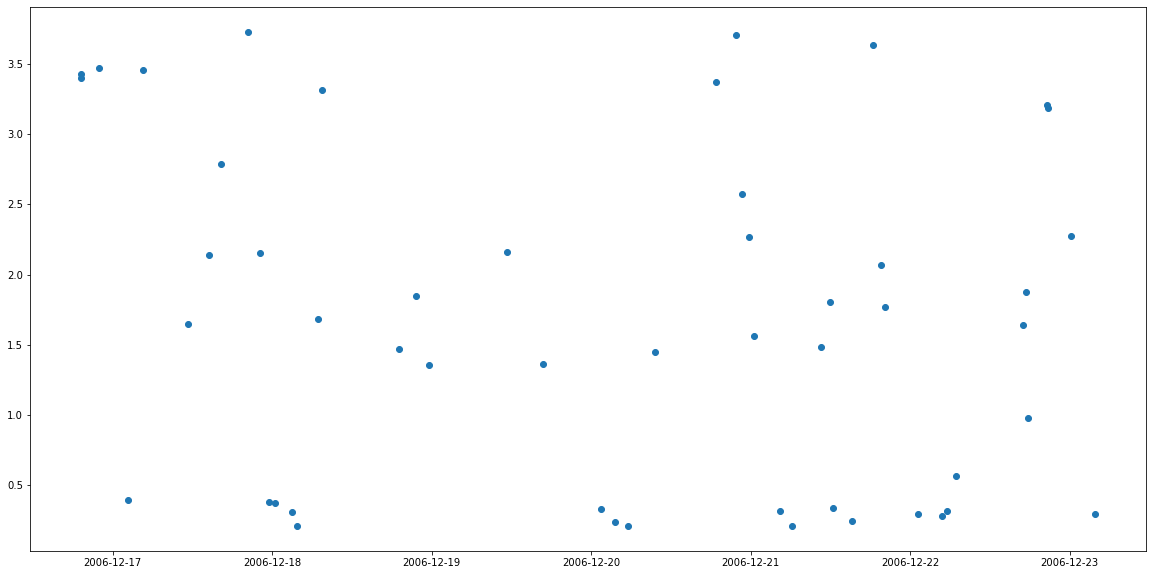

In [57]:
plt.figure(figsize=(20, 10))
plt.plot_date(x=data['date_time'][:50],y=data['Global_active_power'][:50])